In [5]:
import numpy as np
import pandas as pd

import scipy.stats as stats

import pandas_datareader as web

from utils.plotting import plot_series
from utils.helpers import periods

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# CAPM 

**Capital Assets Pricing Model** is a model that helps describing risks and separates portfolio return from market return. 

__


### Portfolio returns

Let's define a portfolio's returns as following:


$$\Large r_p(t) = \sum_i^n w_ir_i(t)$$


Portfolio's return ($r_p$) at time $t$ is essentially a weighted ($w_i$) sum of returns from all securities within the portfolio ($r_i$) at time $t$.

__


### Market cap

We could also imagine the whole market as a portfolio. How could we get weights $w_i$ for each company?

Let's compute market cap:

$$\Large MarketCap = n\_stocks * price$$

So weight for a given company $i$ would be:

$$\Large w_i = \frac{MarketCap_i}{\sum_j^n MarketCap_j}$$

where denominator term signifies the market cap of all other market caps.

__


### CAPM

Let's now look at **CAPM** equation:


$$\Large r_i(t) = \beta_i r_m(t) + \alpha_i(t)$$


where $r_m(t)$ is a market return at time $t$.

<br>

We can easily imagine here that if $\beta$ is equal to 3 (assuming $\alpha = 0$), then our stock's $r_i$ return is three times the return of the market. **CAPM** expects $\alpha$ to be zero or close to zero, so any given stock price should be market return multiplied by $\beta$. In this view $\alpha$ is a simple random error term (and as random, cannot be predicted).

This builds the demarcation line between **active** and **passive** investing. Active investors believe that $\alpha$ can be predicted (at least to some extent) 🙂

Actually, it's sufficient to predict $\alpha$ correctly more than 50% of time to get some sort of profit 💵

__


### Let's break it down!


Further, we can break it up per security if we believe that we have a good idea of what $\alpha$ values will be:


$$\Large r_p(t) = \beta_p r_m(t) + \sum_i^n w_i \alpha_i(t)$$

## Get & examine the data

In [2]:
# Define periods
start, end = periods('2016-01-16', '2020-01-16')

In [15]:
# Get the data for SPY and its four biggest holdings
spy  = web.DataReader('SPY', 'stooq', start, end).sort_index()
aapl = web.DataReader('AAPL', 'stooq', start, end).sort_index()
msft = web.DataReader('MSFT', 'stooq', start, end).sort_index()
amzn = web.DataReader('AMZN', 'stooq', start, end).sort_index()
fb   = web.DataReader('FB', 'stooq', start, end).sort_index()

**SPY** is an ETF that follows S&P500 index.

In [13]:
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-20,183.40,183.71,181.39,183.10,144529577
2015-01-21,182.60,184.58,182.10,184.06,135639634
2015-01-22,184.84,186.89,183.34,186.75,192196273
2015-01-23,186.53,186.75,185.60,185.75,129645260
2015-01-26,185.50,186.31,184.74,186.20,101285851


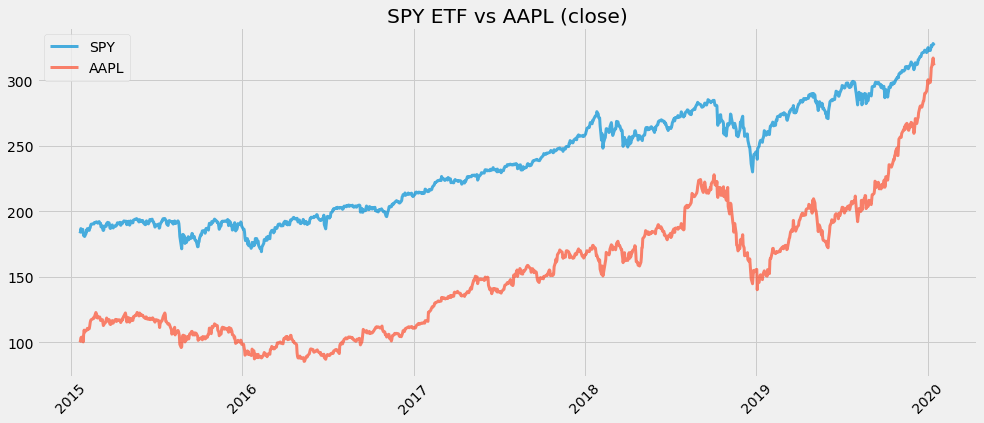

In [18]:
# Plot
plot_series([spy.Close, aapl.Close], 
            ['SPY', 'AAPL'],
            title = 'SPY ETF vs AAPL (close)', lw = 3)

## CAPM

### Cumulative returns

In [19]:
# Get cumulative returns
aapl['cum_ret'] = aapl.Close / aapl.Close.iloc[0]
spy['cum_ret'] = spy.Close / spy.Close.iloc[0]

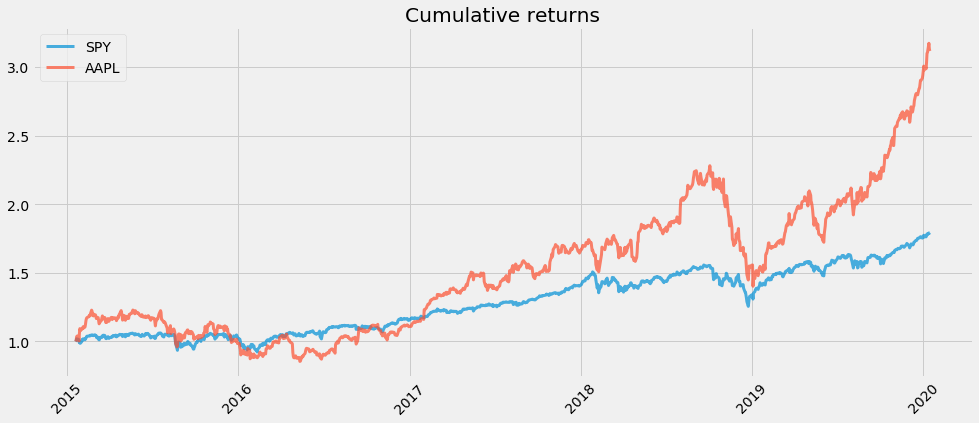

In [20]:
# Plot it
plot_series([spy.cum_ret, aapl.cum_ret],
            ['SPY', 'AAPL'], 
            'Cumulative returns',
            lw = 3)

### Daily returns

In [21]:
# Get daily returns
aapl['daily_ret'] = aapl.Close.pct_change(1)
spy['daily_ret'] = spy.Close.pct_change(1)

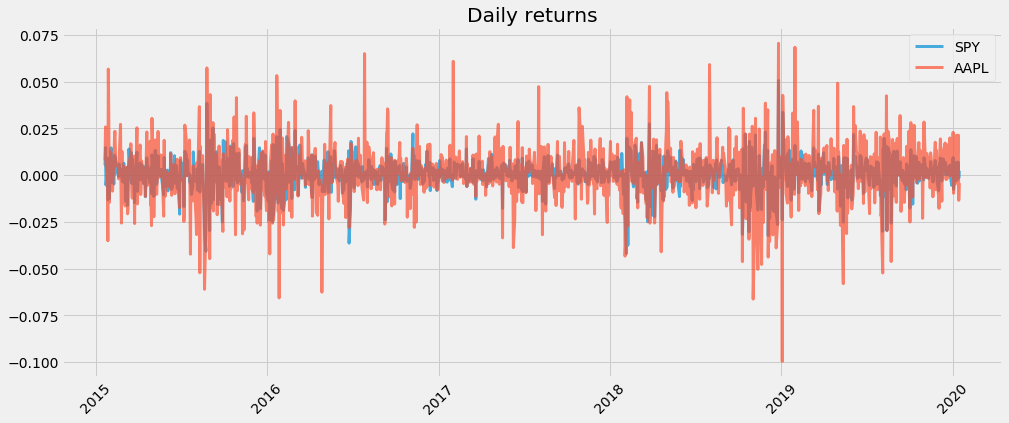

In [25]:
# Plot it
plot_series([spy.daily_ret, aapl.daily_ret],
            ['SPY', 'AAPL'], 
            'Daily returns',
            lw = 3)

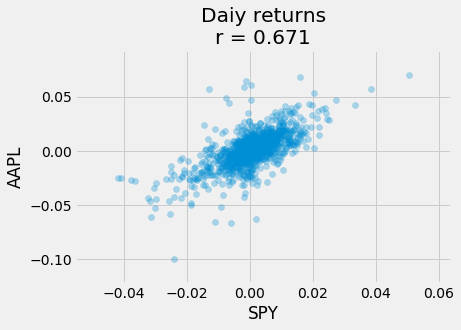

In [36]:
# Sctter daily rets
spy_aapl_cor = stats.pearsonr(spy.daily_ret.dropna(), aapl.daily_ret.dropna())
plt.scatter(spy.daily_ret, aapl.daily_ret, alpha = .3)
plt.xlabel('SPY')
plt.ylabel('AAPL')
plt.title(f'Daiy returns\nr = {round(spy_aapl_cor[0], 3)}')
plt.show()

In [45]:
# Build a regression eq
beta, alpha, r, p, std_err = stats.linregress(x = aapl.daily_ret.dropna(), 
                                              y = spy.daily_ret.dropna())

In [40]:
beta, alpha

(0.3617009227458269, 0.0001285728902649887)

As expected $\alpha$ is close to zero, but not literally zero 🙂

In [46]:
r, p

(0.6706384095173341, 7.145594437906715e-165)

In [47]:
r**2

0.4497558763199395

Apple explains $45$% of variance in **SPY**.